# **Overview**
This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement.

# Dataset Overview

The dataset encompasses customer satisfaction scores over a one-month period on an e-commerce platform named "Shopzilla." It consists of the following features:

* Unique id: Unique identifier for each record (integer).
* Channel name: Name of the customer service channel (object/string).
* Category: Category of the interaction (object/string).
* Sub-category: Sub-category of the interaction (object/string).
* Customer Remarks: Feedback provided by the customer (object/string).
* Order id: Identifier for the order associated with the interaction (integer).
* Order date time: Date and time of the order (datetime).
* Issue reported at: Timestamp when the issue was reported (datetime).
* Issue responded: Timestamp when the issue was responded to (datetime).
* Survey response date: Date of the customer survey response (datetime).
* Customer city: City of the customer (object/string).
* Product category: Category of the product (object/string).
* Item price: Price of the item (float).
* Connected handling time: Time taken to handle the interaction (float).
* Agent name: Name of the customer service agent (object/string).
* Supervisor: Name of the supervisor (object/string).
* Manager: Name of the manager (object/string).
* Tenure Bucket: Bucket categorizing agent tenure (object/string).
* Agent Shift: Shift timing of the agent (object/string).
* CSAT Score: Customer Satisfaction (CSAT) score (integer).


#Project Goal
The primary goal of this project is to develop a deep learning model that can accurately predict the CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real-time, thereby improving service quality and fostering customer loyalty.

# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
# reading the dataset
df = pd.read_csv('eCommerce_Customer_support_data (1).csv')

In [6]:
df.sample(5)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
49585,7a4ec9af-e1bb-4559-909a-b6c17a7b4bf7,Inbound,Returns,Service Centres Related,NaN,461f818c-7214-464b-8cc0-20c149bf3134,NaN,18/08/2023 11:53,18/08/2023 11:56,18-Aug-23,NaN,NaN,NaN,NaN,Rebecca James,Brayden Wong,John Smith,61-90,Morning,5
79805,613cea40-50e9-4cee-9590-e69c978b7721,Outcall,Returns,Reverse Pickup Enquiry,i am happy,ed86c452-fe96-40f2-a993-3c91c36874db,NaN,29/08/2023 10:52,29/08/2023 11:11,29-Aug-23,NaN,NaN,NaN,NaN,James Ford,Emily Yamashita,Michael Lee,>90,Morning,5
33301,b746a6fc-16e4-471b-96f2-7f5c829bce5e,Inbound,Shopzilla Related,Shopzila Premium Related,Please make policies more flexible,NaN,NaN,13/08/2023 20:34,13/08/2023 20:35,13-Aug-23,NaN,NaN,NaN,NaN,Victor Rivera,Lily Chen,Michael Lee,>90,Evening,5
9592,c0f69e89-c092-4862-a2b0-02bad557e691,Inbound,Order Related,Installation/demo,Good guide,NaN,NaN,04/08/2023 00:35,04/08/2023 00:43,04-Aug-23,NaN,NaN,NaN,NaN,Tiffany Smith,Mia Patel,Emily Chen,61-90,Evening,5
10203,bb9879bb-fee0-4a73-a45c-2bcec90e18c8,Inbound,Returns,Reverse Pickup Enquiry,NaN,0a5a60e7-0076-4826-8111-bbc6a354bcba,NaN,05/08/2023 19:34,05/08/2023 19:58,05-Aug-23,NaN,NaN,NaN,NaN,Lisa Wilson,Isabella Wong,Emily Chen,>90,Afternoon,5


In [7]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [8]:
df.tail()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4
85906,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,NaN,3230db30-f8da-4c44-8636-ec76d1d3d4f3,NaN,31/08/2023 23:36,31/08/2023 23:37,31-Aug-23,NaN,NaN,NaN,NaN,Elizabeth Guerra,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,5


In [9]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [10]:
df.shape

(85907, 20)

In [11]:
df.isnull()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
3,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
85903,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
85904,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
85905,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [13]:
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

## Data Preprocessing

### Identification of Missing Data

In [14]:
# summarize and rank missing values column-wise
missing_counts = df.isna().sum()
missing_counts = missing_counts.sort_values(ascending=False)
missing_counts


connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Unique id                      0
Sub-category                   0
category                       0
channel_name                   0
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

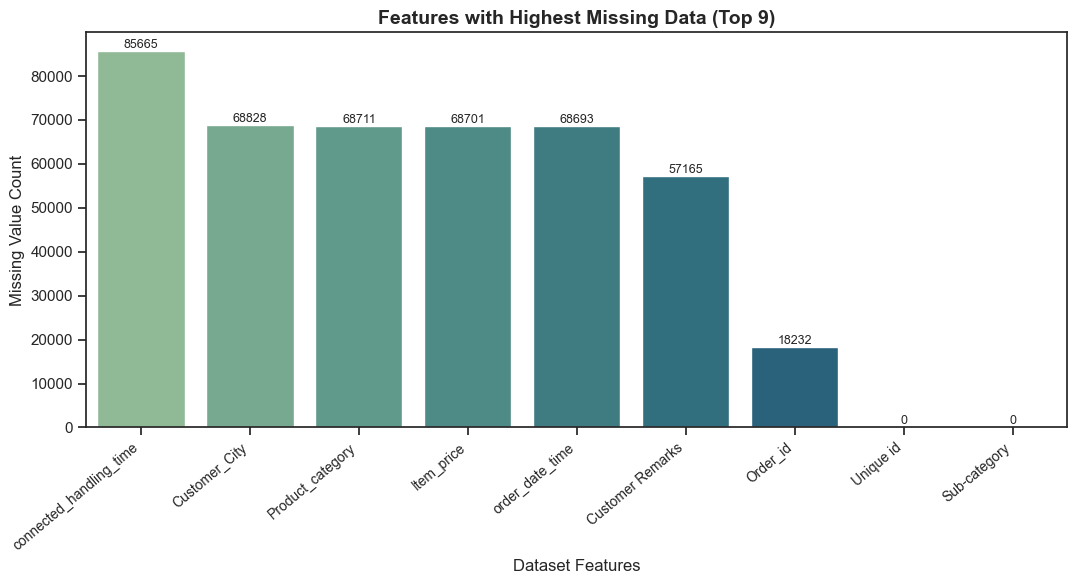

In [15]:
# apply a clean visualization theme
sns.set_theme(style="ticks")

# visualize columns with highest missing value counts
plt.figure(figsize=(11, 6))
sns.barplot(
    x=missing_counts.index[:9],
    y=missing_counts.values[:9],
    palette="crest"
)

# annotate bar values
for idx, count in enumerate(missing_counts.values[:9]):
    plt.text(idx, count + 1, f"{count}", ha="center", va="bottom", fontsize=9)

# configure axis labels and title
plt.xticks(rotation=40, ha="right", fontsize=10)
plt.xlabel("Dataset Features", fontsize=12)
plt.ylabel("Missing Value Count", fontsize=12)
plt.title("Features with Highest Missing Data (Top 9)", fontsize=14, weight="bold")

plt.tight_layout()
plt.show()


### Remove columns exceeding the missing value threshold (70%)

In [16]:
### Remove columns exceeding the missing value threshold (70%)

# connected_handling_time → 99.72% missing
# Customer_City → 80.12% missing
# Product_category → 79.96% missing
# Item_price → 79.95% missing
# order_date_time → 79.94% missing

cols_to_drop = ['connected_handling_time', 'Customer_City', 'Product_category', 'Item_price', 'order_date_time']
df = df.drop(columns=cols_to_drop)

print("Columns retained after removal:", df.columns)


Columns retained after removal: Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'Issue_reported at', 'issue_responded',
       'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager',
       'Tenure Bucket', 'Agent Shift', 'CSAT Score'],
      dtype='object')


### Handle missing values for columns below the 70% threshold

In [17]:
# Customer Remarks → 66.54% missing
# Order_id → 21.22% missing

df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')


In [18]:

# as Order_id acts as a unique key, rows with missing values are removed
df = df.dropna(subset=['Order_id'])

In [19]:
df.isna().sum()

Unique id               0
channel_name            0
category                0
Sub-category            0
Customer Remarks        0
Order_id                0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

### Analyze unique entries and their frequencies

In [20]:

for column in df:
    print(f"\nColumn Name: {column}")
    print(df[column].unique())





Column Name: Unique id
['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238']

Column Name: channel_name
['Outcall' 'Inbound' 'Email']

Column Name: category
['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']

Column Name: Sub-category
['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Centres Related' 'Payment related Queries'
 'Order status enquiry' 'Return cancellation' 'Unable to track'
 'Seller Cancelled Order' 'Wrong' 'Invoice request' 'Priority delivery'
 'Refund Related Issues' 'Signup I

In [21]:
print("\nUnique value count per column:")
for column in df:
    print(f"{column} - {df[column].nunique()}")


Unique value count per column:
Unique id - 67675
channel_name - 3
category - 12
Sub-category - 57
Customer Remarks - 14500
Order_id - 67675
Issue_reported at - 26535
issue_responded - 25506
Survey_response_Date - 31
Agent_name - 1371
Supervisor - 40
Manager - 6
Tenure Bucket - 5
Agent Shift - 5
CSAT Score - 5


In [22]:
df.duplicated().sum()

np.int64(0)

### Information of Dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67675 entries, 0 to 85906
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             67675 non-null  object
 1   channel_name          67675 non-null  object
 2   category              67675 non-null  object
 3   Sub-category          67675 non-null  object
 4   Customer Remarks      67675 non-null  object
 5   Order_id              67675 non-null  object
 6   Issue_reported at     67675 non-null  object
 7   issue_responded       67675 non-null  object
 8   Survey_response_Date  67675 non-null  object
 9   Agent_name            67675 non-null  object
 10  Supervisor            67675 non-null  object
 11  Manager               67675 non-null  object
 12  Tenure Bucket         67675 non-null  object
 13  Agent Shift           67675 non-null  object
 14  CSAT Score            67675 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 8.3

### Changing  the Datatype

In [24]:
# changing datatype of datetime columns

datetime_col = ['Issue_reported at', 'issue_responded', 'Survey_response_Date']

for col in datetime_col :
  df[col] = pd.to_datetime(df[col], format='mixed', dayfirst=True)

In [25]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Issue_reported at,67675,2023-08-17 17:23:08.479350016,2023-07-28 20:42:00,2023-08-09 12:32:00,2023-08-18 20:44:00,2023-08-25 12:08:00,2023-08-31 23:58:00,NaN
issue_responded,67675,2023-08-17 19:50:48.267750144,2023-08-01 00:00:00,2023-08-09 14:42:00,2023-08-19 07:01:00,2023-08-25 14:00:30,2023-08-31 23:59:00,NaN
Survey_response_Date,67675,2023-08-17 05:35:10.421869056,2023-08-01 00:00:00,2023-08-09 00:00:00,2023-08-19 00:00:00,2023-08-25 00:00:00,2023-08-31 00:00:00,NaN
CSAT Score,67675.0,4.225445,1.0,4.0,5.0,5.0,5.0,1.392488


In [26]:
df.describe(include=["object"]).T

,count,unique,top,freq
Unique id,67675,67675,07c7a878-0d5a-42e0-97ef-de59abec0238,1
channel_name,67675,3,Inbound,53278
category,67675,12,Returns,34501
Sub-category,67675,57,Reverse Pickup Enquiry,17433
Customer Remarks,67675,14500,No Remarks,45036
Order_id,67675,67675,3230db30-f8da-4c44-8636-ec76d1d3d4f3,1
Agent_name,67675,1371,Wendy Taylor,346
Supervisor,67675,40,Carter Park,3448
Manager,67675,6,John Smith,19516
Tenure Bucket,67675,5,>90,23877


## EDA - Exploratory Data Analysis

1. What is the distribution of CSAT scores?

Understanding the spread of CSAT scores helps identify customer satisfaction trends.

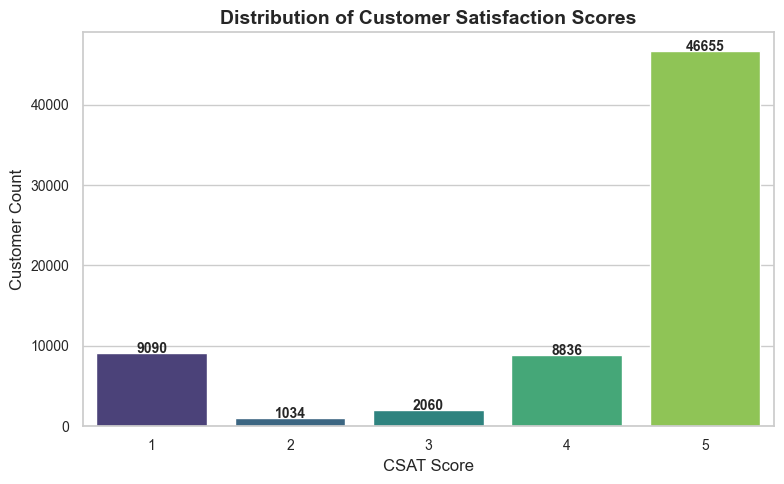

In [27]:
# apply a consistent plotting theme
sns.set_theme(style="whitegrid")

# initialize the plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='CSAT Score',
    palette='viridis',
    order=sorted(df['CSAT Score'].dropna().unique())
)

# display value labels above each bar
for bar in ax.patches:
    count = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        count + 1,
        int(count),
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

# set plot labels and title
plt.title("Distribution of Customer Satisfaction Scores", fontsize=14, weight='bold')
plt.xlabel("CSAT Score", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


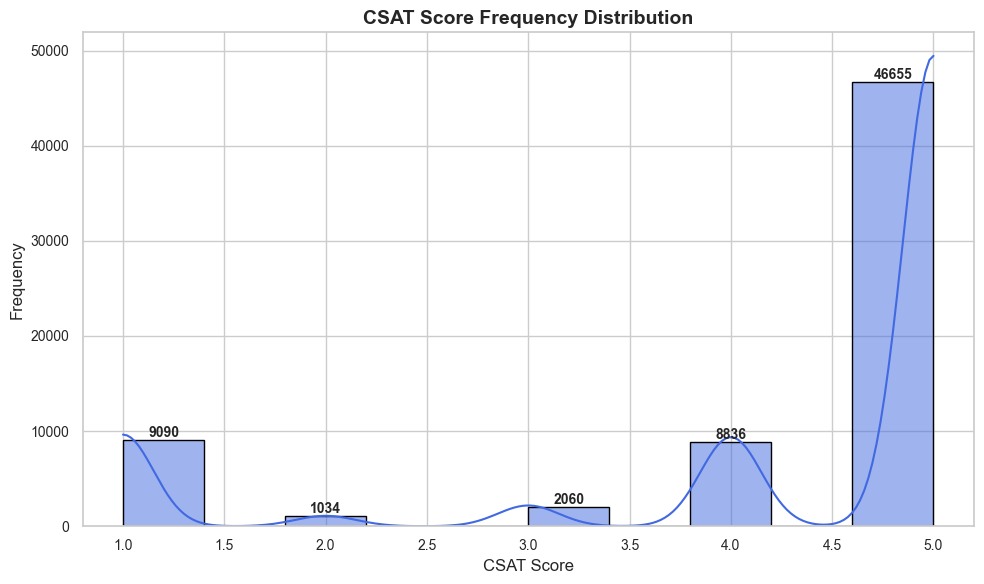

In [28]:
# apply a clean visualization style
sns.set_theme(style="whitegrid")

# generate histogram for CSAT scores
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df,
    x='CSAT Score',
    bins=10,
    kde=True,
    color='royalblue',
    edgecolor='black'
)

# annotate each non-empty bin with its frequency
for bar in ax.patches:
    value = bar.get_height()
    if value > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            value + 1,
            f"{int(value)}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )

# define axis labels and title
plt.title("CSAT Score Frequency Distribution", fontsize=14, weight="bold")
plt.xlabel("CSAT Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


2. How does customer satisfaction differ across service channels?

Analyzing CSAT by channel helps identify strong and underperforming communication platforms.

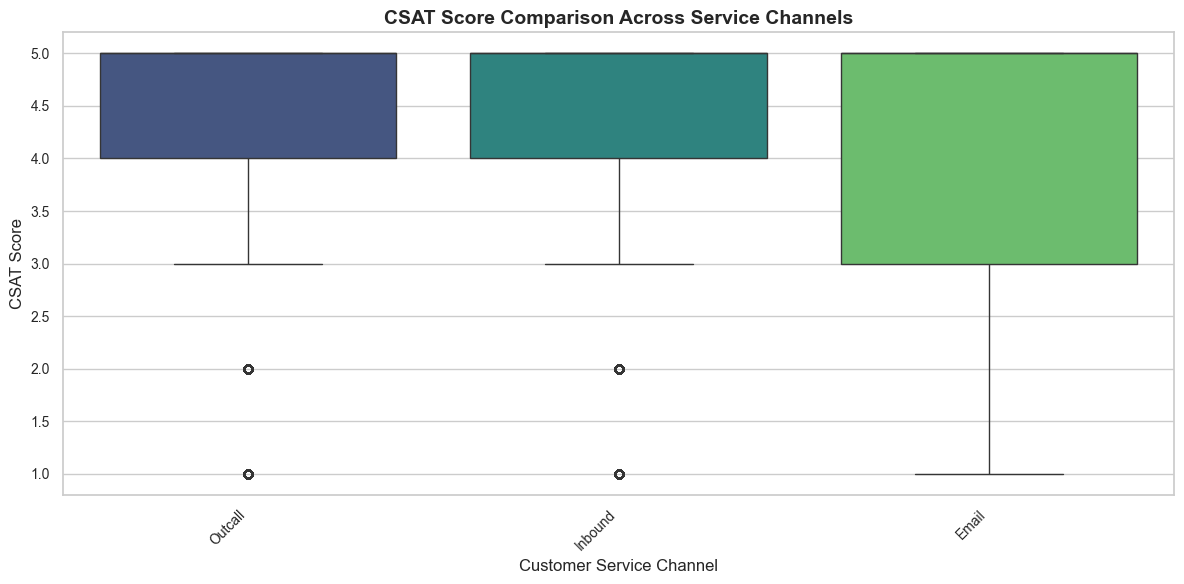

In [29]:
# apply a consistent plotting style
sns.set_theme(style="whitegrid")

# visualize CSAT distribution across service channels
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=df,
    x='channel_name',
    y='CSAT Score',
    palette='viridis'
)

# add title and axis labels
plt.title("CSAT Score Comparison Across Service Channels", fontsize=14, weight="bold")
plt.xlabel("Customer Service Channel", fontsize=12)
plt.ylabel("CSAT Score", fontsize=12)

# format axis ticks
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# enhance readability with gridlines
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()


3. Which interaction categories are most associated with low CSAT scores?

This analysis helps pinpoint service areas that require immediate improvement.

In [30]:
low_csat = df[df['CSAT Score'] <= 2]  # Assuming scores 1-2 are low
category_counts = low_csat['category'].value_counts().head(10)

category_counts

category
Returns              4362
Order Related        3400
Refund Related        585
Product Queries       454
Cancellation          424
Feedback              309
Shopzilla Related     291
Payments related      202
Offers & Cashback      55
Others                 24
Name: count, dtype: int64

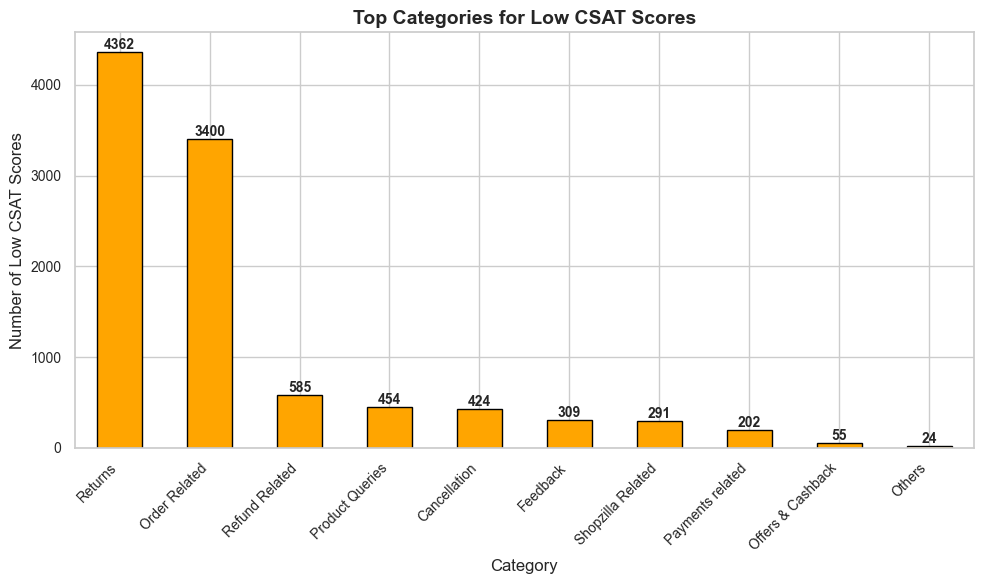

In [31]:
# Create the plot
plt.figure(figsize=(10, 6))
ax = category_counts.plot(kind='bar', color='orange', edgecolor='black')

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Set titles and labels
plt.title('Top Categories for Low CSAT Scores', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Low CSAT Scores', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Apply tight layout for spacing
plt.tight_layout()
plt.show()

4. Which five customer service channels achieve the highest average CSAT scores?

This analysis highlights the channels that consistently deliver superior customer satisfaction.

In [32]:
# Calculate average CSAT score by channel_name
channel_csat_avg = df.groupby('channel_name')['CSAT Score'].mean().reset_index()

# Sort and pick top 5
top_channels = channel_csat_avg.sort_values(by='CSAT Score', ascending=False).head(5)

top_channels

,channel_name,CSAT Score
2,Outcall,4.260682
1,Inbound,4.233473
0,Email,3.901192


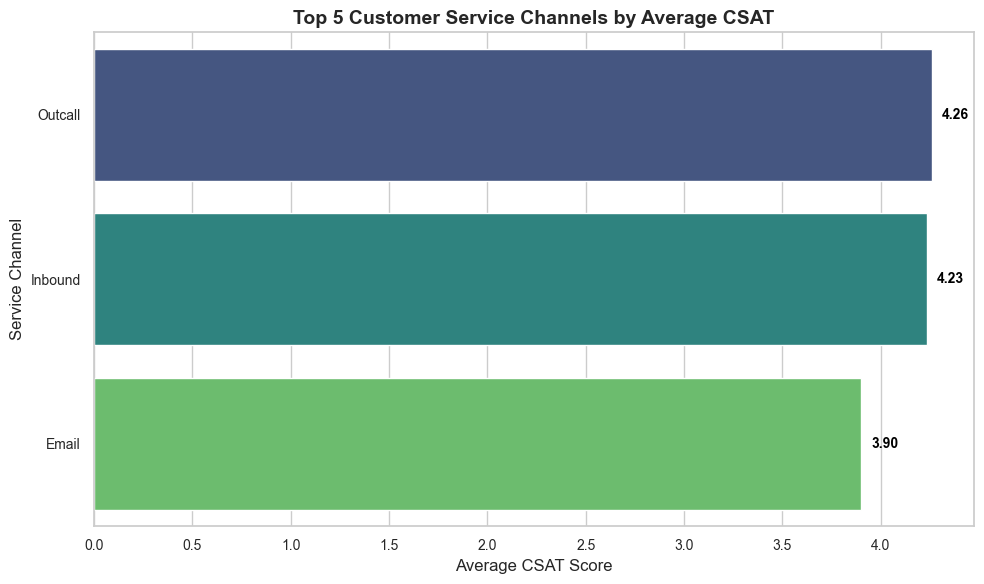

In [33]:
# apply a clean plotting style
sns.set_theme(style="whitegrid")

# create a horizontal bar chart for top-performing channels
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_channels,
    x='CSAT Score',
    y='channel_name',
    palette='viridis'
)

# annotate each bar with the average CSAT value
for idx, avg_score in enumerate(top_channels['CSAT Score']):
    ax.text(
        avg_score + 0.05,
        idx,
        f"{avg_score:.2f}",
        va="center",
        ha="left",
        fontsize=10,
        fontweight="bold",
        color="black"
    )

# add title and axis labels
plt.title("Top 5 Customer Service Channels by Average CSAT", fontsize=14, weight="bold")
plt.xlabel("Average CSAT Score", fontsize=12)
plt.ylabel("Service Channel", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


5. How do CSAT scores change over time?

This analysis examines daily or weekly trends to understand shifts in customer satisfaction.

In [34]:
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'])
csat_trend = df.groupby('Survey_response_Date')['CSAT Score'].mean()

csat_trend

Survey_response_Date
2023-08-01    4.188256
2023-08-02    4.186695
2023-08-03    3.719880
2023-08-04    3.723735
2023-08-05    4.243713
2023-08-06    4.242972
2023-08-07    4.198739
2023-08-08    4.172333
2023-08-09    4.172512
2023-08-10    4.224824
2023-08-11    4.238131
2023-08-12    3.967251
2023-08-13    3.880157
2023-08-14    3.921799
2023-08-15    3.959108
2023-08-16    3.821485
2023-08-17    4.186658
2023-08-18    4.207678
2023-08-19    4.209936
2023-08-20    4.241753
2023-08-21    4.245020
2023-08-22    4.246589
2023-08-23    4.286685
2023-08-24    4.323093
2023-08-25    4.263137
2023-08-26    4.305017
2023-08-27    4.036545
2023-08-28    4.333530
2023-08-29    4.361041
2023-08-30    4.319188
2023-08-31    4.293847
Name: CSAT Score, dtype: float64

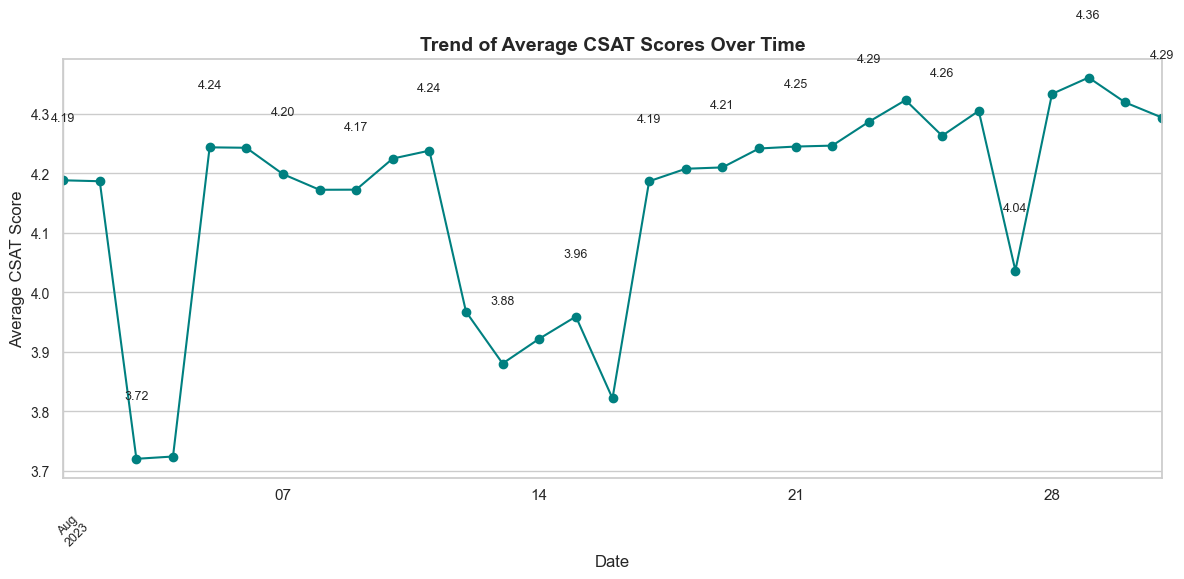

In [35]:
# apply a uniform visual theme
sns.set_theme(style="whitegrid")

# plot CSAT trend across time
plt.figure(figsize=(12, 6))
ax = csat_trend.plot(marker="o", linestyle="-", color="teal")

# annotate selected data points to avoid clutter
step = max(1, len(csat_trend) // 12)
for idx, (date, avg_score) in enumerate(csat_trend.items()):
    if idx % step == 0:
        ax.text(
            date,
            avg_score + 0.1,
            f"{avg_score:.2f}",
            ha="center",
            fontsize=9
        )

# add labels and title
plt.title("Trend of Average CSAT Scores Over Time", fontsize=14, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average CSAT Score", fontsize=12)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()


6. Which manager–supervisor combinations achieve the highest average CSAT scores?

This analysis highlights leadership pairs that consistently deliver strong customer satisfaction outcomes.

In [36]:
# Group by Manager and Supervisor, calculate mean CSAT, and sort descending
manager_supervisor_csat = (
    df.groupby(['Manager', 'Supervisor'])['CSAT Score']
    .mean()
    .round(3)
    .reset_index()
    .rename(columns={'CSAT Score': 'Average CSAT Score'})
    .sort_values(by='Average CSAT Score', ascending=False)
)

# Display top 10 combinations
print("Top 10 Manager-Supervisor Pairs by Average CSAT Score:\n")
print(manager_supervisor_csat.head(10).to_string(index=False))

Top 10 Manager-Supervisor Pairs by Average CSAT Score:

   Manager       Supervisor  Average CSAT Score
Emily Chen     Zoe Yamamoto               4.549
John Smith     Nathan Patel               4.548
Olivia Tan      Mason Gupta               4.490
Emily Chen     Nathan Patel               4.470
Emily Chen Elijah Yamaguchi               4.468
John Smith Elijah Yamaguchi               4.458
John Smith    Olivia Suzuki               4.446
John Smith     Brayden Wong               4.441
Emily Chen      Olivia Wang               4.433
Emily Chen    Landon Tanaka               4.431


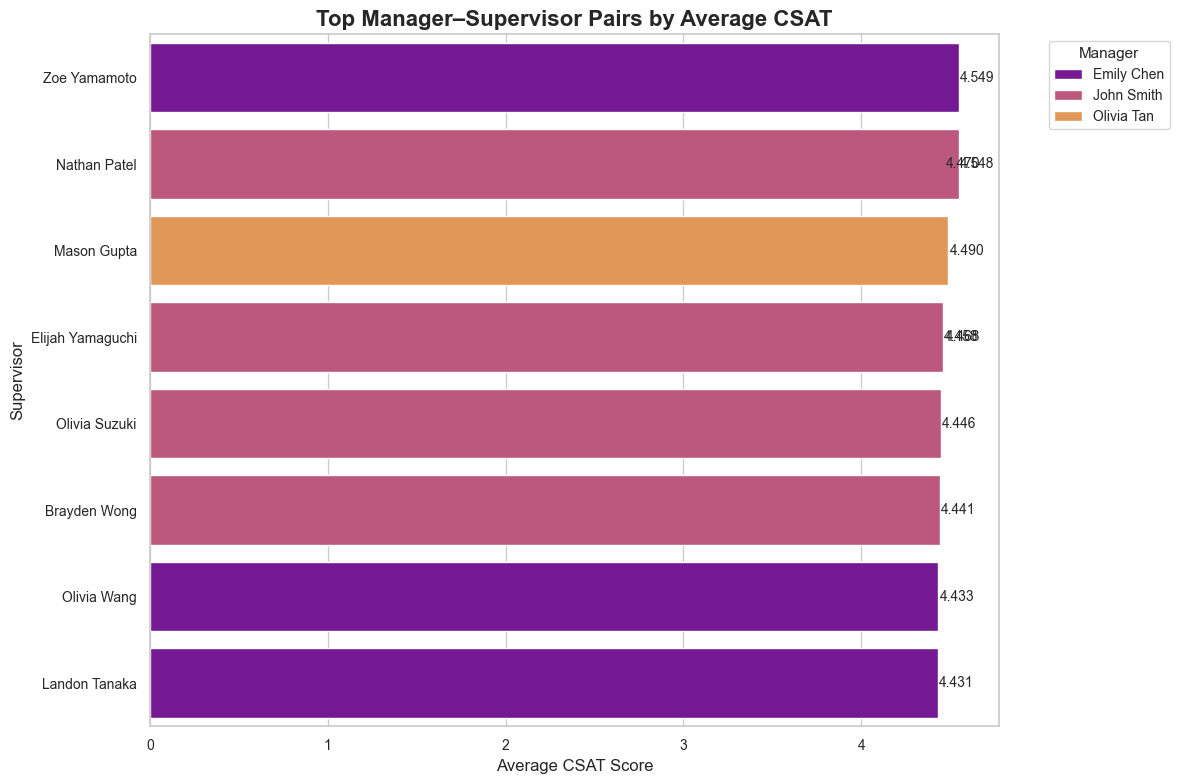

In [37]:
# select top-performing manager–supervisor pairs
top_10 = manager_supervisor_csat.head(10)

# create a horizontal bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top_10,
    x="Average CSAT Score",
    y="Supervisor",
    hue="Manager",
    palette="plasma",
    dodge=False
)

# label each bar with the CSAT value
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt="%.3f",
        label_type="edge",
        padding=1,
        fontsize=10
    )

# set titles and axis labels
plt.title("Top Manager–Supervisor Pairs by Average CSAT", fontsize=16, weight="bold")
plt.xlabel("Average CSAT Score", fontsize=12)
plt.ylabel("Supervisor", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# place legend outside the plot area
plt.legend(
    title="Manager",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()
plt.show()


7. How does an agent’s work shift relate to average CSAT performance?

This analysis evaluates whether customer satisfaction varies across different agent shifts.

In [38]:
# Calculate average CSAT score for each shift
shift_csat_avg = df.groupby('Agent Shift')['CSAT Score'].mean().reset_index()

# Sort for better visualization
shift_csat_avg = shift_csat_avg.sort_values(by='CSAT Score', ascending=False)

shift_csat_avg

,Agent Shift,CSAT Score
4,Split,4.397441
0,Afternoon,4.277997
3,Night,4.267980
1,Evening,4.261733
2,Morning,4.173269


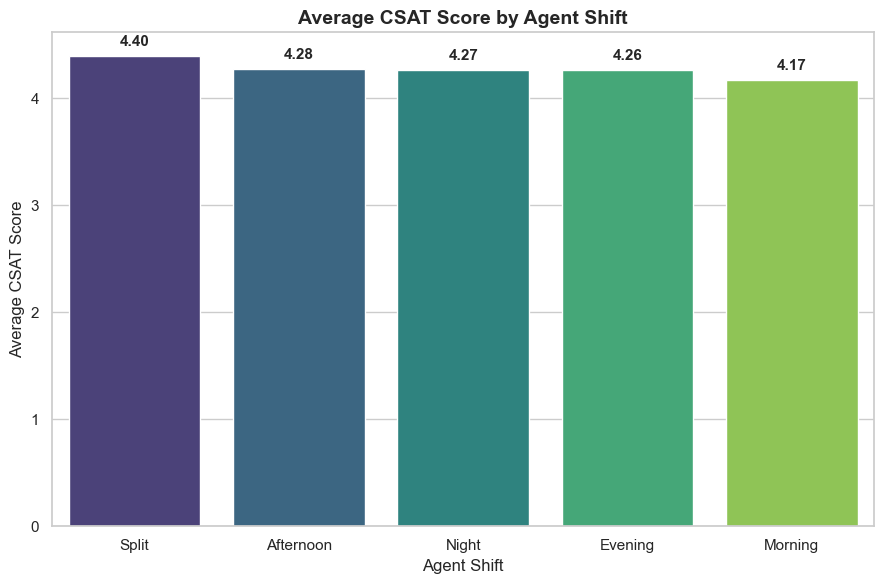

In [39]:
# apply a clean visualization theme
sns.set_theme(style="whitegrid")

# create bar chart for CSAT by agent shift
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=shift_csat_avg,
    x="Agent Shift",
    y="CSAT Score",
    palette="viridis"
)

# add CSAT value labels above bars
for bar in ax.patches:
    score = bar.get_height()
    ax.annotate(
        f"{score:.2f}",
        (bar.get_x() + bar.get_width() / 2, score),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        xytext=(0, 5),
        textcoords="offset points"
    )

# add plot title and axis labels
plt.title("Average CSAT Score by Agent Shift", fontsize=14, weight="bold")
plt.xlabel("Agent Shift", fontsize=12)
plt.ylabel("Average CSAT Score", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


8. How does interaction category influence average CSAT scores?

This analysis examines whether different interaction types are linked to variations in customer satisfaction.

In [40]:
# Calculate average CSAT score for each interaction category
category_csat_avg = df.groupby('category')['CSAT Score'].mean().reset_index()

# Sort for better visualization
category_csat_avg = category_csat_avg.sort_values(by='CSAT Score', ascending=False)

category_csat_avg

,category,CSAT Score
7,Payments related,4.374509
0,App/website,4.357143
10,Returns,4.327034
11,Shopzilla Related,4.277671
9,Refund Related,4.191870
3,Offers & Cashback,4.175141
2,Feedback,4.162177
4,Onboarding related,4.132075
5,Order Related,4.086022
8,Product Queries,4.078788


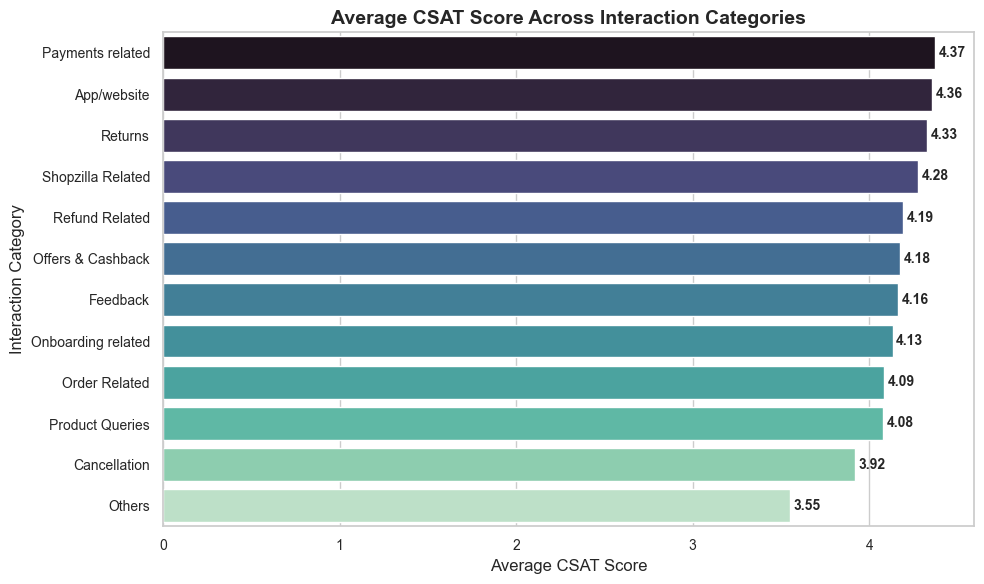

In [41]:
# apply a consistent visual theme
sns.set_theme(style="whitegrid")

# plot average CSAT scores by interaction category
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=category_csat_avg,
    x="CSAT Score",
    y="category",
    palette="mako",
    orient="h"
)

# annotate bars with average CSAT values
for bar in ax.patches:
    avg_score = bar.get_width()
    ax.annotate(
        f"{avg_score:.2f}",
        (avg_score + 0.02, bar.get_y() + bar.get_height() / 2),
        ha="left",
        va="center",
        fontsize=10,
        fontweight="bold"
    )

# add title and axis labels
plt.title("Average CSAT Score Across Interaction Categories", fontsize=14, weight="bold")
plt.xlabel("Average CSAT Score", fontsize=12)
plt.ylabel("Interaction Category", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


9. How does an agent’s tenure level impact average CSAT scores?

This analysis evaluates whether experience, grouped by tenure buckets, influences customer satisfaction.

In [42]:
# Calculate average CSAT score by tenure bucket
tenure_csat_avg = df.groupby('Tenure Bucket')['CSAT Score'].mean().reset_index()

# Sort the data
tenure_csat_avg = tenure_csat_avg.sort_values(by='CSAT Score', ascending=False)

tenure_csat_avg

,Tenure Bucket,CSAT Score
2,61-90,4.322781
1,31-60,4.283867
3,>90,4.246053
0,0-30,4.236222
4,On Job Training,4.147996


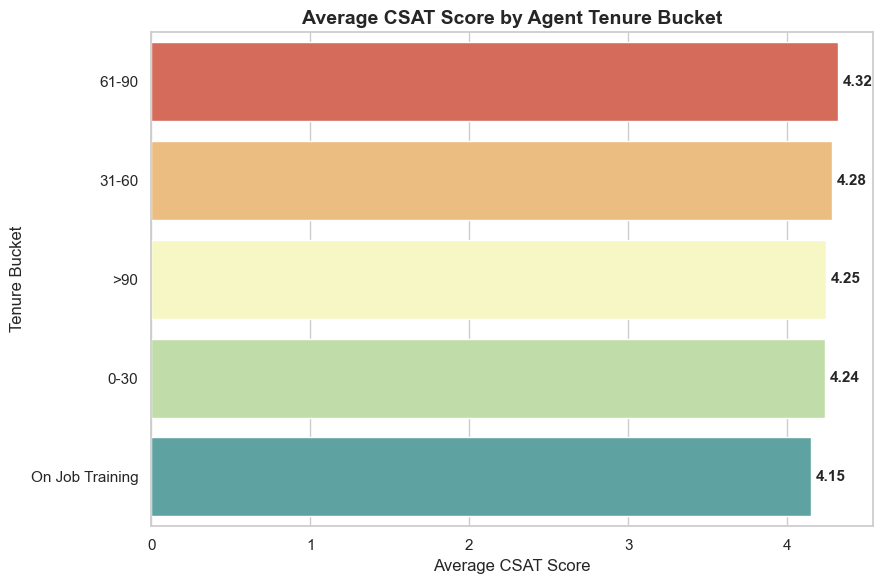

In [43]:
# apply a uniform plot style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=tenure_csat_avg,
    x="CSAT Score",
    y="Tenure Bucket",
    palette="Spectral"
)

# annotate each bar with its average CSAT value
for idx, avg_score in enumerate(tenure_csat_avg["CSAT Score"]):
    ax.text(
        avg_score + 0.03,
        idx,
        f"{avg_score:.2f}",
        va="center",
        ha="left",
        fontsize=11,
        fontweight="bold"
    )

# set titles and axis labels
plt.title("Average CSAT Score by Agent Tenure Bucket", fontsize=14, weight="bold")
plt.xlabel("Average CSAT Score", fontsize=12)
plt.ylabel("Tenure Bucket", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


10. How are CSAT scores distributed across different agent shifts?

This analysis compares how satisfaction score levels are spread within each shift.

In [44]:
# Count CSAT scores per agent shift
shift_csat_distribution = df.groupby('Agent Shift')['CSAT Score'].value_counts().unstack().fillna(0)
shift_csat_distribution

CSAT Score,1,2,3,4,5
Agent Shift,,,,,
Afternoon,559,85,114,582,3232
Evening,3340,383,787,3470,18505
Morning,4796,513,1047,4356,22156
Night,130,20,33,97,735
Split,265,33,79,331,2027


<Figure size 1200x700 with 0 Axes>

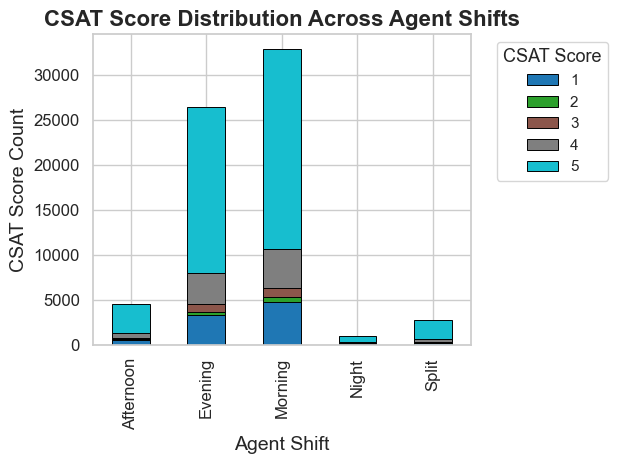

In [45]:
# visualize CSAT score distribution by agent shift
plt.figure(figsize=(12, 7))
shift_csat_distribution.plot(
    kind="bar",
    stacked=True,
    colormap="tab10",
    edgecolor="black",
    linewidth=0.7
)

# add title and axis labels
plt.title("CSAT Score Distribution Across Agent Shifts", fontsize=16, weight="bold")
plt.xlabel("Agent Shift", fontsize=14)
plt.ylabel("CSAT Score Count", fontsize=14)

# format legend and ticks
plt.legend(
    title="CSAT Score",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=11,
    title_fontsize=13
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### Data Transformation

* Encoding Categorical Features

Categorical variables such as channel_name, category, and sub-category cannot be directly used by neural networks.

One-hot encoding converts these categories into numerical binary features.

This ensures the model can properly learn patterns without assuming any ordinal relationship.

In [46]:
# One-hot encoding for categorical variables
categorical_columns = ['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [47]:
df_encoded.head()

,Unique id,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,CSAT Score,channel_name_Inbound,channel_name_Outcall,category_Cancellation,...,Manager_Olivia Tan,Manager_William Kim,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,No Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,5,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,No Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,5,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,200814dd-27c7-4149-ba2b-bd3af3092880,No Remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,5,True,False,False,...,False,True,False,False,False,True,True,False,False,False
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,No Remarks,5aed0059-55a4-4ec6-bb54-97942092020a,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,5,True,False,False,...,False,False,False,False,True,False,True,False,False,False
4,ba903143-1e54-406c-b969-46c52f92e5df,No Remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,5,True,False,True,...,False,False,False,False,False,False,False,True,False,False


* Scaling the CSAT Score

Normalization rescales the CSAT Score to a 0–1 range.

This prevents features with larger values from dominating model learning.

It helps improve training stability and convergence in neural networks.

In [48]:
# Initialize scaler
scaler = MinMaxScaler()

# Normalize CSAT Score
df_encoded['CSAT Score'] = scaler.fit_transform(df_encoded[['CSAT Score']])


* Converting DateTime Columns

Transform datetime columns (Issue_reported at, issue_responded, Survey_response_Date) into numeric features like hour, day, etc.

In [49]:
# Extract datetime features
for col in ['Issue_reported at', 'issue_responded', 'Survey_response_Date']:
    df_encoded[f'{col}_hour'] = pd.to_datetime(df[col]).dt.hour
    df_encoded[f'{col}_day'] = pd.to_datetime(df[col]).dt.day
    df_encoded[f'{col}_month'] = pd.to_datetime(df[col]).dt.month

# Drop original datetime columns
df_encoded.drop(['Issue_reported at', 'issue_responded', 'Survey_response_Date'], axis=1, inplace=True)


## Splitting Data

Split the dataset into training and testing sets for model training.

In [50]:
df_encoded.drop(columns=['Unique id', 'Order_id', 'Customer Remarks'], axis= 1, inplace= True)

In [51]:
df_encoded.head()

,CSAT Score,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,category_Others,category_Payments related,...,Agent Shift_Split,Issue_reported at_hour,Issue_reported at_day,Issue_reported at_month,issue_responded_hour,issue_responded_day,issue_responded_month,Survey_response_Date_hour,Survey_response_Date_day,Survey_response_Date_month
0,1.0,False,True,False,False,False,False,False,False,False,...,False,11,1,8,11,1,8,0,1,8
1,1.0,False,True,False,False,False,False,False,False,False,...,False,12,1,8,12,1,8,0,1,8
2,1.0,True,False,False,False,False,False,True,False,False,...,False,20,1,8,20,1,8,0,1,8
3,1.0,True,False,False,False,False,False,False,False,False,...,False,20,1,8,21,1,8,0,1,8
4,1.0,True,False,True,False,False,False,False,False,False,...,False,10,1,8,10,1,8,0,1,8


In [52]:

# Define features (X) and target (y)
X = df_encoded.drop(['CSAT Score'], axis=1)
y = df_encoded['CSAT Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# check datatype of columns

print(X_train.dtypes)
print(X_test.dtypes)


channel_name_Inbound           bool
channel_name_Outcall           bool
category_Cancellation          bool
category_Feedback              bool
category_Offers & Cashback     bool
                              ...  
issue_responded_day           int32
issue_responded_month         int32
Survey_response_Date_hour     int32
Survey_response_Date_day      int32
Survey_response_Date_month    int32
Length: 1500, dtype: object
channel_name_Inbound           bool
channel_name_Outcall           bool
category_Cancellation          bool
category_Feedback              bool
category_Offers & Cashback     bool
                              ...  
issue_responded_day           int32
issue_responded_month         int32
Survey_response_Date_hour     int32
Survey_response_Date_day      int32
Survey_response_Date_month    int32
Length: 1500, dtype: object


In [54]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [55]:
# Ensure target values are within expected range before scaling:
# This assumes original CSAT scores were in range [1, 5]
# If not, adjust the range accordingly

original_y_train = scaler.inverse_transform(y_train.values.reshape(-1, 1)).astype(int).ravel()
assert set(original_y_train).issubset(set([1, 2, 3, 4, 5]))

# Convert target to one-hot encoded format
y_train_cat = to_categorical(original_y_train - 1)  # Classes 0-4 for one-hot encoding
y_test_cat = to_categorical(scaler.inverse_transform(y_test.values.reshape(-1, 1)).astype(int).ravel() - 1)


In [56]:
# Define ANN model architecture

model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),       # Dropout layer with 30% rate
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6842 - loss: 1.0057 - val_accuracy: 0.6890 - val_loss: 0.9566
Epoch 2/10
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6895 - loss: 0.9627 - val_accuracy: 0.6890 - val_loss: 0.9513
Epoch 3/10
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6895 - loss: 0.9525 - val_accuracy: 0.6890 - val_loss: 0.9508
Epoch 4/10
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6895 - loss: 0.9456 - val_accuracy: 0.6889 - val_loss: 0.9393
Epoch 5/10
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6897 - loss: 0.9406 - val_accuracy: 0.6890 - val_loss: 0.9403
Epoch 6/10
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6894 - loss: 0.9370 - val_accuracy: 0.6890 - val_loss: 0.9373
Epoch 7/10
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6903 - loss: 0.9324 - val_accuracy: 0.6891 - val_loss: 0.9370
Epoch 8/10
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6904 - loss: 0.931

### Key Insights

* Training Performance
The model achieves an accuracy of approximately 69% on the training set, indicating it has learned meaningful patterns from the data.

* Validation Performance
Validation accuracy is around 69%, slightly lower than training accuracy. This gap suggests mild overfitting, where the model’s performance drops on unseen data.

* Loss Analysis
The training loss (0.92) is lower than the validation loss (0.96). This difference reinforces the indication of limited overfitting.

* Test Performance
Test accuracy is approximately 68.95%, closely matching the validation results. This consistency confirms that the model’s generalization capability is reliably reflected during training.

In [57]:
# Consider additional preprocessing techniques
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Feature scaling with StandardScaler (might work better than MinMaxScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection to reduce noise
selector = SelectKBest(f_classif, k=50)  # Select top 50 features
X_selected = selector.fit_transform(X_scaled, y)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Learning rate reduction
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

# Improved model training
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,  # Use validation split instead of separate test set
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/10
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6934 - loss: 0.9143 - val_accuracy: 0.6891 - val_loss: 0.9178 - learning_rate: 0.0010
Epoch 2/10
677/677 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6926 - loss: 0.9138 - val_accuracy: 0.6874 - val_loss: 0.9216 - learning_rate: 0.0010
Epoch 3/10
677/677 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6929 - loss: 0.9128 - val_accuracy: 0.6865 - val_loss: 0.9281 - learning_rate: 0.0010
Epoch 4/10
677/677 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6925 - loss: 0.9122 - val_accuracy: 0.6868 - val_loss: 0.9205 - learning_rate: 0.0010
Epoch 5/10
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6927 - loss: 0.9097 - val_accuracy: 0.6871 - val_loss: 0.9245 - learning_rate: 0.0010
Epoch 6/10
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6942 - loss: 0.9081 - val_accuracy: 0.6871 - val_loss: 0.9254 - learning_rate: 0.0010
Epoch 7/10
677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.9000 - 

* Dropout Regularization
Dropout randomly disables a fraction of neurons during training, reducing dependency on specific neurons and helping control overfitting. Common values range from 0.2 to 0.5.

* L2 Regularization
L2 regularization discourages large weight values, promoting simpler and more generalizable models. It can be applied in Dense layers using kernel_regularizer=l2(0.01).

* Learning Rate Scheduling
A learning rate scheduler automatically lowers the learning rate when validation loss stops improving. This allows the model to refine weights more effectively in later training stages.

### Observations

* Early Stopping was implemented to stop training when validation loss failed to improve for 10 consecutive epochs, preventing unnecessary training and reducing overfitting risk.

* ReduceLROnPlateau was used to automatically lower the learning rate when validation loss stagnates, allowing finer weight optimization.

* The narrow difference between training accuracy (70.53%) and validation accuracy (69.93%) indicates good model generalization with minimal overfitting.

* Neural networks typically require large datasets for strong generalization, and the current data volume may constrain performance.

* To improve results, approaches such as data augmentation, synthetic data generation, or transfer learning using pre-trained models can be considered.

### Save model and scaler file

In [59]:
# import required libraries
import os
import joblib
from tensorflow.keras.models import Model  # for clarity: Keras model

# define project root directory (current working directory)
save_dir = os.getcwd()

# save the trained Keras model in root folder
model_path = os.path.join(save_dir, "csat_model.keras")
model.save(model_path)
print("Model saved successfully at:", model_path)

# save the scaler object in root folder
scaler_path = os.path.join(save_dir, "scaler.pkl")
joblib.dump(scaler, scaler_path)
print("Scaler saved successfully at:", scaler_path)

# confirm save location
print("Files saved in project root directory:", save_dir)


Model saved successfully at: k:\Master's Sessions\E_Commerce_Customer_Satisfaction_Score_Prediction\csat_model.keras
Scaler saved successfully at: k:\Master's Sessions\E_Commerce_Customer_Satisfaction_Score_Prediction\scaler.pkl
Files saved in project root directory: k:\Master's Sessions\E_Commerce_Customer_Satisfaction_Score_Prediction


In [63]:
from sklearn.preprocessing import OneHotEncoder
import joblib

# categorical columns used in training
categorical_columns = [
    'channel_name',
    'category',
    'Sub-category',
    'Agent_name',
    'Manager',
    'Agent_Shift'
]

# create encoder
encoder = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=True
)

# FIT encoder on FULL training data (VERY IMPORTANT)
encoder.fit(df[categorical_columns])

# save encoder
joblib.dump(encoder, "encoder.pkl")

print("encoder.pkl saved successfully")


KeyError: "['Agent_Shift'] not in index"